<a href="https://colab.research.google.com/github/NikhithaVarma/Guvi-Task7/blob/main/Assignment_15(Decision_Tree_Classifier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Social_Network_Ads.csv

Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,classification_report,confusion_matrix,plot_confusion_matrix,plot_roc_curve

Importing the dataset

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.shape
df.isnull().sum()
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
#userid is not required here so drop that column
df.drop("User ID",inplace=True,axis=1)
df.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [5]:
df=df.drop_duplicates()
df.shape

(380, 4)

In [6]:
#gender also has no impact for the prediction of purchasing a car, so drop the column
df.drop("Gender", axis=1, inplace=True)
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


Splitting the dataset into the Training set and Test set

In [40]:
X = df[['Age', 'EstimatedSalary']].values # fts
y = df['Purchased'].values # target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2) # train- test split
X_train.shape

(304, 2)

In [41]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0])

Feature Scaling

In [42]:
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test = scaler.transform(X_test) # transform the test data 

Fitting Decision Tree Classification to the Training set

In [43]:
##there is 1 param to play with - max depth - to choose the best parameter, I will try different combinations and choose the one which has the best accuracy/auc/any eval metric on cross-validation or test data-set
from sklearn.model_selection import cross_val_score
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,12,15,20]:
  dt=DecisionTreeClassifier(max_depth=depth)
  dt.fit(X_train, y_train) # the model is trained
  trainAccuracy = accuracy_score(y_train, dt.predict(X_train))
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.8289473684210527  Cross val score :  0.8225806451612903
Depth  :  2  Training Accuracy :  0.9078947368421053  Cross val score :  0.8950537634408603
Depth  :  3  Training Accuracy :  0.9111842105263158  Cross val score :  0.8950537634408603
Depth  :  4  Training Accuracy :  0.9407894736842105  Cross val score :  0.8715053763440862
Depth  :  5  Training Accuracy :  0.9506578947368421  Cross val score :  0.884731182795699
Depth  :  6  Training Accuracy :  0.9539473684210527  Cross val score :  0.8749462365591398
Depth  :  7  Training Accuracy :  0.9671052631578947  Cross val score :  0.8616129032258065
Depth  :  8  Training Accuracy :  0.9703947368421053  Cross val score :  0.8582795698924732
Depth  :  9  Training Accuracy :  0.9835526315789473  Cross val score :  0.8584946236559139
Depth  :  10  Training Accuracy :  0.9901315789473685  Cross val score :  0.8617204301075269
Depth  :  12  Training Accuracy :  0.993421052631579  Cross val score :  0.86161

I got depth=2 is the best with max cross val score

compared to d=1 and d=2, d=1 model is underfit

compared to d=2 and d=10, d=10 model is overfit

In [56]:
dt=DecisionTreeClassifier(max_depth=2)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

Predicting the Test set results

In [57]:
y_pred=dt.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0])

Making the Confusion Matrix

In [58]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[49,  5],
       [ 1, 21]])

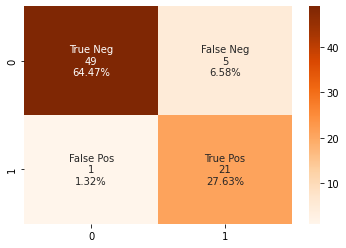

In [59]:
import seaborn as sns
group_names = ["True Neg","False Neg","False Pos","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Oranges')

Accuracy : 0.9210526315789473
Roc_Auc-score : 0.930976430976431


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


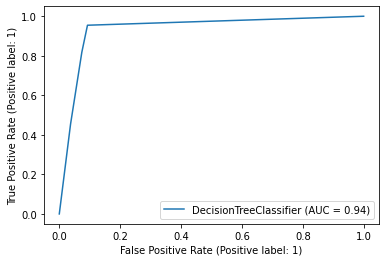

In [60]:
#Evaluating The Predection
print("Accuracy :",accuracy_score(y_test,y_pred))
print("Roc_Auc-score :",roc_auc_score(y_test,y_pred))

plot_roc_curve(dt, X_test, y_test)

Visualising the Training set results

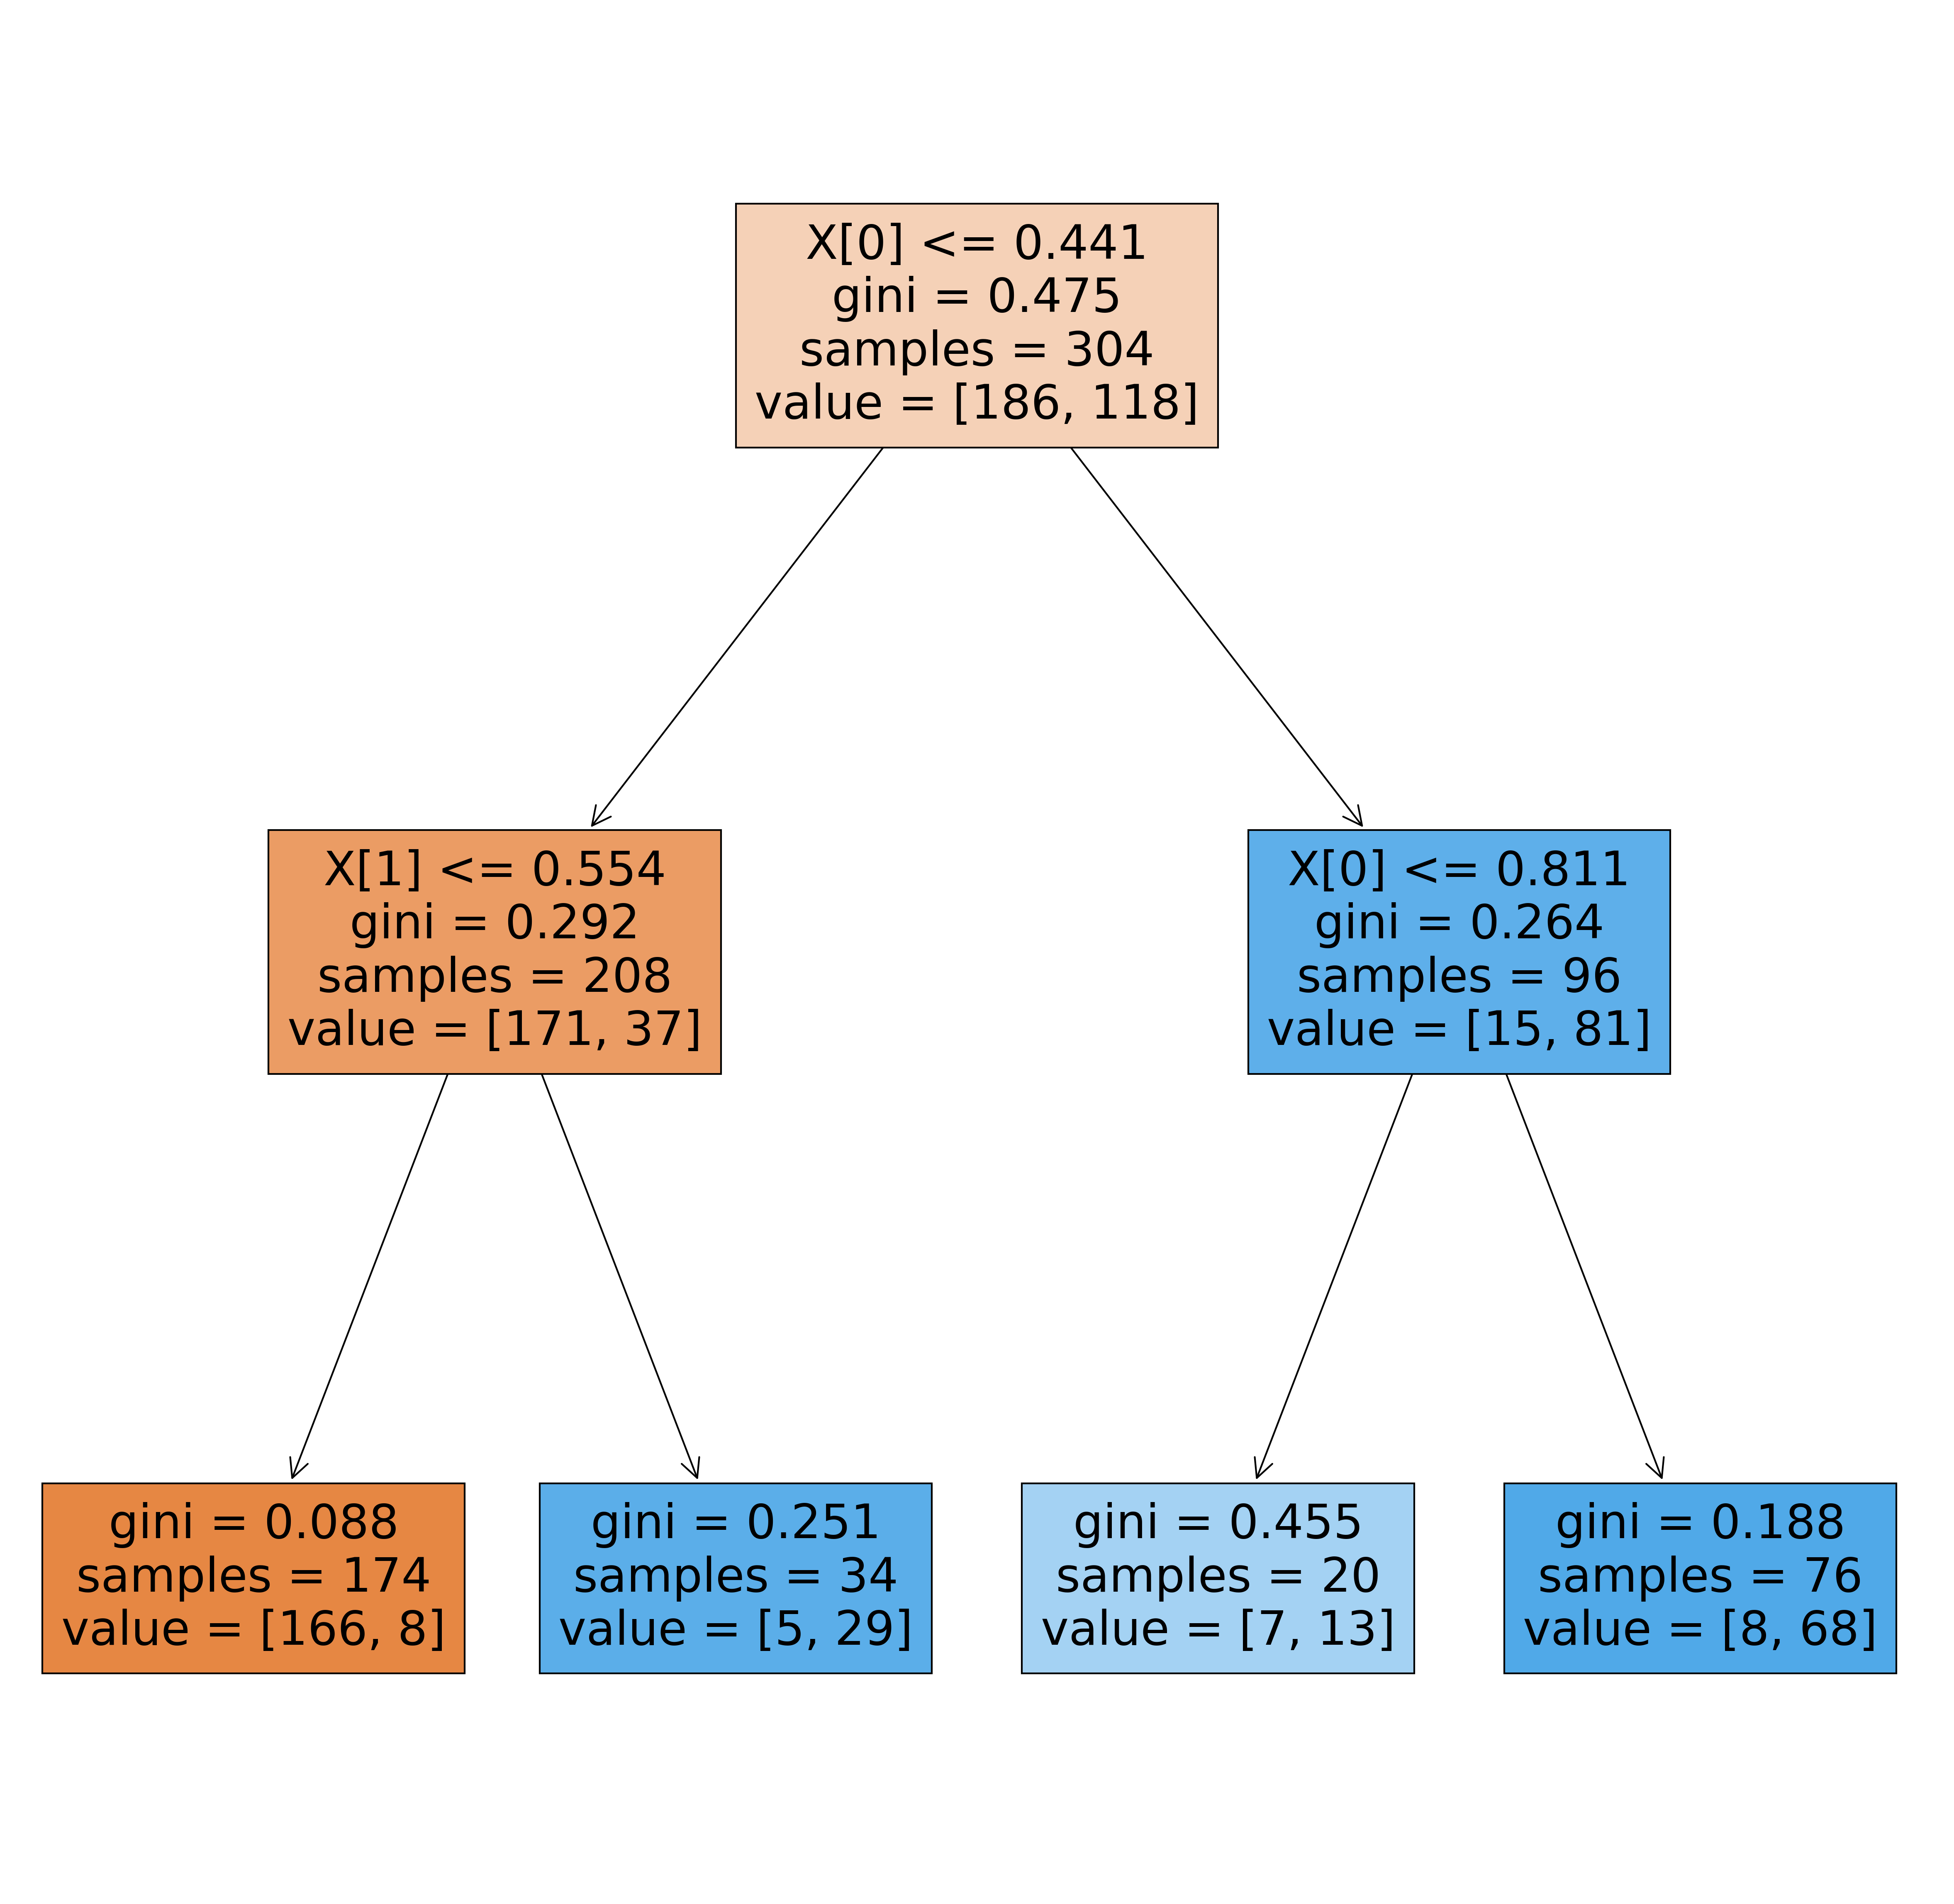

In [65]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=300)
from sklearn import tree
tree.plot_tree(dt.fit(X_train, y_train),filled=True)
fig.savefig('imagename.png')


Visualising the Test set results

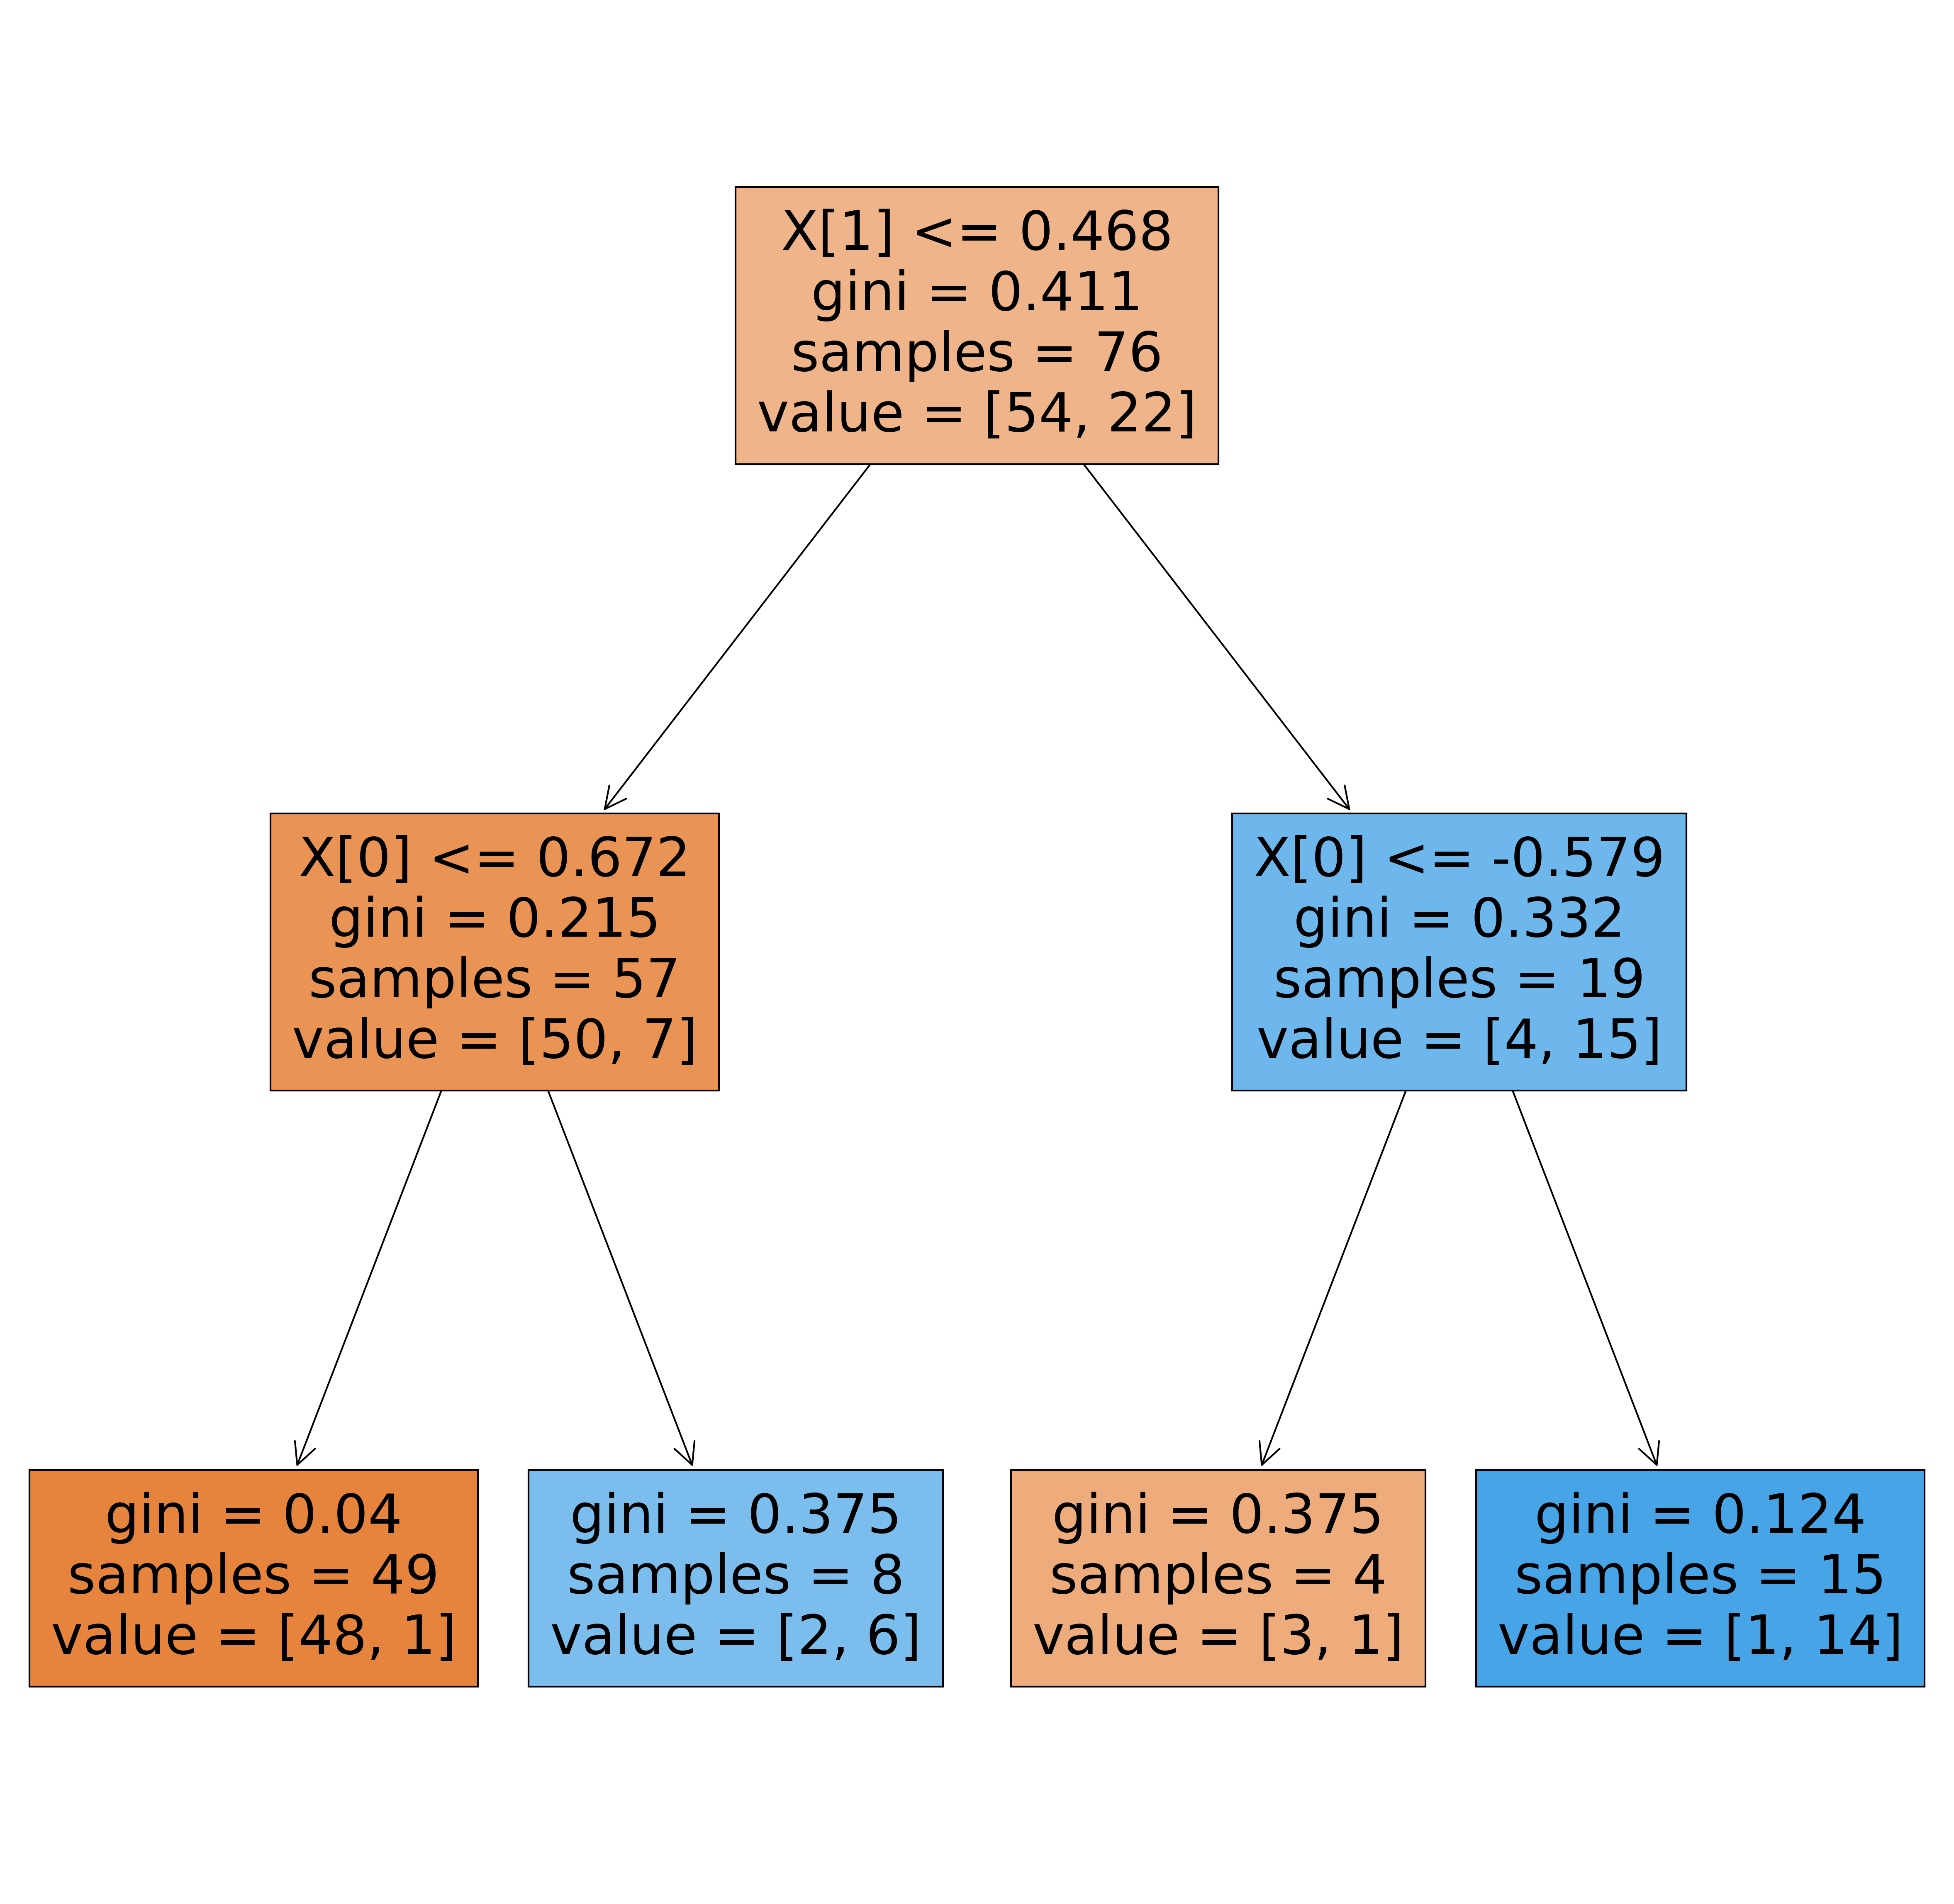

In [66]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=300)
from sklearn import tree
tree.plot_tree(dt.fit(X_test, y_test),filled=True)
fig.savefig('imagename.png')